In [50]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import preprocessing

data = pd.read_csv(
    "https://raw.githubusercontent.com/RodriNico2206/Data-science-s-projects/refs/heads/master/Bike_Purchasement_Prediction-Streamlit/bike_buyers.csv"
)

In [51]:
# Display the breakdown of the dataframe
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB
None


In [52]:
# Add the sum of null values for each column
null_values = data.isnull().sum()
print(null_values)

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [53]:
# Fill missing values
data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Income'].fillna(data['Income'].median(), inplace=True)
data['Children'].fillna(data['Children'].median(), inplace=True)
data['Home Owner'].fillna(data['Home Owner'].mode()[0], inplace=True)
data['Cars'].fillna(data['Cars'].median(), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

# Verify that there are no more missing values
print(data.isnull().sum())

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


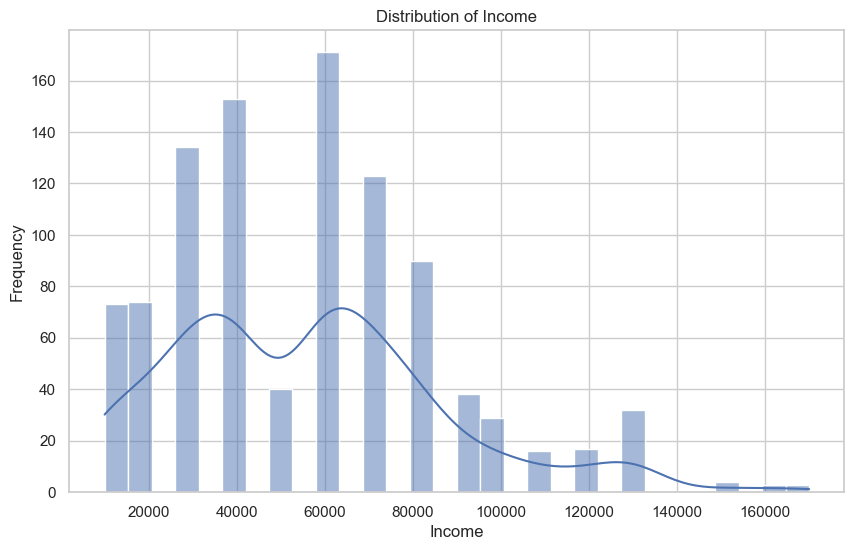

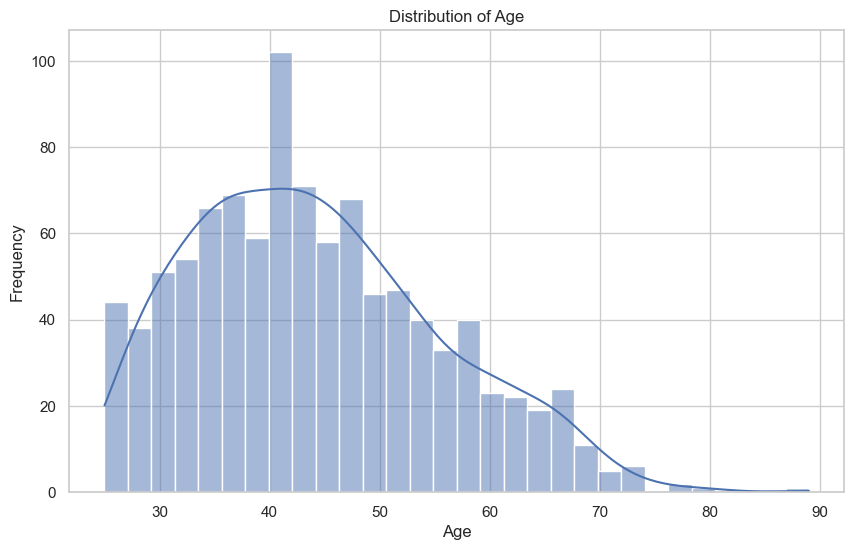

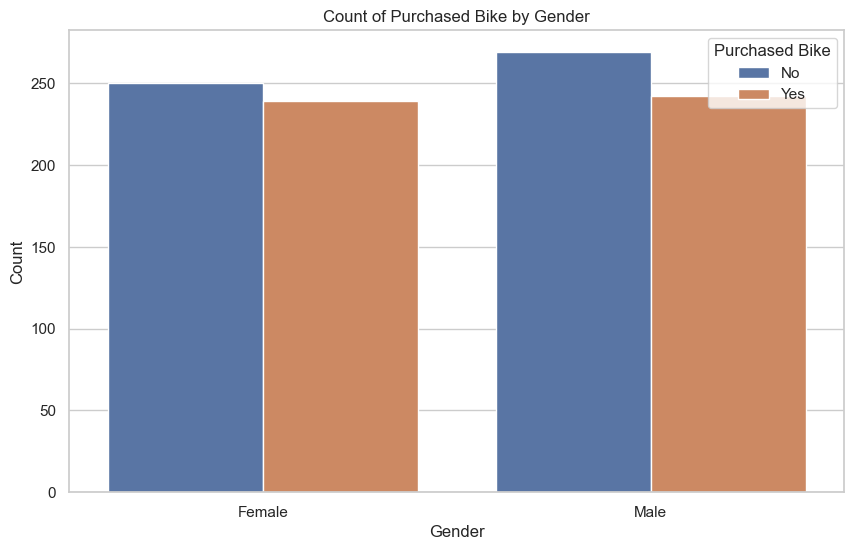

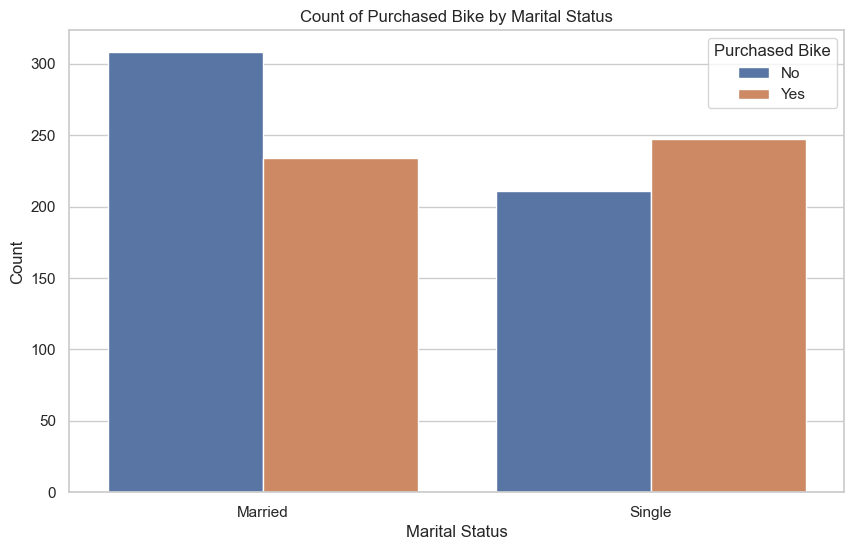

In [54]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], kde=True, bins=30)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count of Purchased Bike by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Purchased Bike', data=data)
plt.title('Count of Purchased Bike by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Count of Purchased Bike by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', hue='Purchased Bike', data=data)
plt.title('Count of Purchased Bike by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Summary of conclusions based on the dataset

## 1. Data Overview
The dataset contains 1000 entries and 13 columns.
The columns include demographic information, income, and bike purchase status.

## 2. Missing Values
Missing Values:
- ID: 0
- Marital Status: 7
- Gender: 11
- Income: 6
- Children: 8
- Education: 0
- Occupation: 0
- Home Owner: 4
- Cars: 9
- Commute Distance: 0
- Region: 0
- Age: 8
- Purchased Bike: 0

The dataset had missing values in the following columns:
- Marital Status: 7 missing values
- Gender: 11 missing values
- Income: 6 missing values
- Children: 8 missing values
- Home Owner: 4 missing values
- Cars: 9 missing values
- Age: 8 missing values

These missing values were filled using the mode for categorical columns and the median for numerical columns.

## 3. Data Types
Data Types:
- ID: int64
- Marital Status: object
- Gender: object
- Income: float64
- Children: float64
- Education: object
- Occupation: object
- Home Owner: object
- Cars: float64
- Commute Distance: object
- Region: object
- Age: float64
- Purchased Bike: object

The dataset contains a mix of numerical and categorical data.

## 4. Distribution Insights
The distribution of income and age was visualized using histograms.
The count of purchased bikes was visualized by gender and marital status using count plots.

## 5. Potential Analysis
The dataset can be used to analyze factors influencing bike purchases.
Potential analyses include:
- The impact of income on bike purchases
- The influence of marital status and gender on bike purchases
- The relationship between the number of children and bike purchases
- The effect of age on bike purchases

In [55]:
# Drop unuseful columns
data.drop(['ID', 'Education', 'Occupation', 'Commute Distance', 'Region'], axis=1, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features and target variables
X = data_encoded.drop('Purchased Bike_Yes', axis=1)
y = data_encoded['Purchased Bike_Yes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (800, 7)
X_test shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)


In [56]:
data_encoded.describe

<bound method NDFrame.describe of        Income  Children  Cars   Age  Marital Status_Single  Gender_Male  \
0     40000.0       1.0   0.0  42.0                      0            0   
1     30000.0       3.0   1.0  43.0                      0            1   
2     80000.0       5.0   2.0  60.0                      0            1   
3     70000.0       0.0   1.0  41.0                      1            1   
4     30000.0       0.0   0.0  36.0                      1            1   
..        ...       ...   ...   ...                    ...          ...   
995   60000.0       2.0   2.0  54.0                      0            1   
996   70000.0       4.0   0.0  35.0                      1            1   
997   60000.0       2.0   0.0  38.0                      0            1   
998  100000.0       3.0   3.0  38.0                      1            1   
999   60000.0       3.0   2.0  53.0                      1            1   

     Home Owner_Yes  Purchased Bike_Yes  
0                 1    

In [57]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Classifier Accuracy: {rf_accuracy}')

# Support Vector Classifier (SVC)
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f'Support Vector Classifier Accuracy: {svc_accuracy}')

# K-Nearest Neighbors Classifier (KNN)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'K-Nearest Neighbors Classifier Accuracy: {knn_accuracy}')

Random Forest Classifier Accuracy: 0.65
Support Vector Classifier Accuracy: 0.57
K-Nearest Neighbors Classifier Accuracy: 0.605
